In [23]:
import pandas as pd
from datetime import datetime
import numpy as np
from numba import njit
from tqdm import tqdm


import plotly.graph_objects as go
import plotly.express as px
import typing as tp
import vectorbt as vbt
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.DataFrame(vbt.YFData.download('BTC-USD').get('Close'))
df = df[df.index>'2022-09-01']
df.head(3)

,Close
Date,
2022-09-02 00:00:00+00:00,19969.771484
2022-09-03 00:00:00+00:00,19832.087891
2022-09-04 00:00:00+00:00,19986.712891


In [25]:
df.tail(3)

,Close
Date,
2024-10-10 00:00:00+00:00,60274.500000
2024-10-11 00:00:00+00:00,62445.089844
2024-10-12 00:00:00+00:00,63137.191406


In [26]:
length = len(df)
df['entries'] = np.random.rand(length) < 0.5   # Randomly 15% of rows True\
# df['entries'] = True
df['entries'].value_counts()

entries
True     398
False    374
Name: count, dtype: int64

In [41]:
pf = vbt.Portfolio.from_signals(
    close = df.Close,  # Ceny zamknięcia
    entries = 1,  # Sygnały wejścia
    exits = None,  # Sygnały wyjścia
    sl_stop = 0.9,
    size=1,
    # tp_stop = 0.15,
    # sl_trail= True,
    accumulate=True)
tot_ret = np.round(pf.total_return(), 2)
print(f"RET:{tot_ret}, Trades:{ pf.stats()[11:12].values[0]}")

RET:2.16, Trades:1


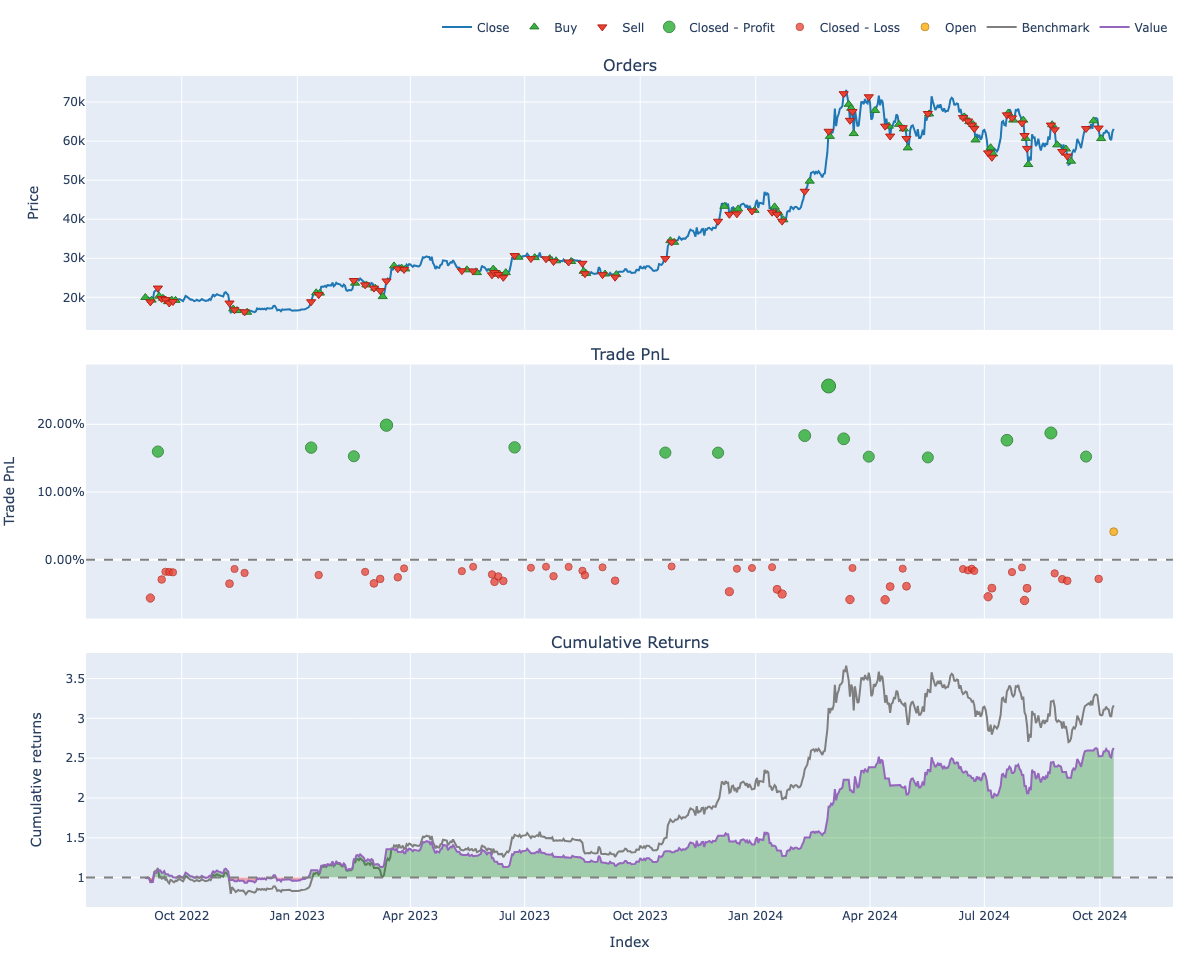

Start                         2022-09-02 00:00:00+00:00
End                           2024-10-12 00:00:00+00:00
Period                                772 days 00:00:00
Start Value                                       100.0
End Value                                    262.730315
Total Return [%]                             162.730315
Benchmark Return [%]                         216.163815
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              22.245561
Max Drawdown Duration                 214 days 00:00:00
Total Trades                                         71
Total Closed Trades                                  70
Total Open Trades                                     1
Open Trade PnL                                10.421487
Win Rate [%]                                  21.428571
Best Trade [%]                                25.656858
Worst Trade [%]                               -6

In [38]:
# Wizualizacja wyników
pf.plot().show()

# Wyświetlenie podsumowania wyników
print(pf.stats())


In [32]:
print(pf.orders.records_readable)

   Order Id  Column                 Timestamp      Size         Price  Fees  \
0         0       0 2022-09-02 00:00:00+00:00  0.005008  19969.771484   0.0   

  Side  
0  Buy  
